<a href="https://colab.research.google.com/github/RenanNB360/PyTorch/blob/main/Deep_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1: Importação das bibliotecas

In [1]:
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu118'

In [2]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [3]:
dataset_train = datasets.MNIST('MNIST-data', train = True, download = True,
                               transform = transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 256,
                                           shuffle = True)

In [4]:
dataset_val = datasets.MNIST('MNIST-data', train = False, download = True,
                             transform = transforms.ToTensor())
loader_val = torch.utils.data.DataLoader(dataset_val, batch_size = 256,
                                         shuffle = True)

## Etapa 3: Construção do autoencoder

In [5]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder0 = nn.Linear(in_features = 784, out_features = 128)
        self.encoder1 = nn.Linear(128, 64)
        self.encoder2 = nn.Linear(64, 32)

        self.decoder0 = nn.Linear(32, 64)
        self.decoder1 = nn.Linear(64, 128)
        self.decoder2 = nn.Linear(128, 784)

        self.activation0 = nn.ReLU()
        self.activation1 = nn.Sigmoid()

    def forward(self, X):
        X = self.activation0(self.encoder0(X))
        X = self.activation0(self.encoder1(X))
        X = self.activation0(self.encoder2(X))

        X = self.activation0(self.decoder0(X))
        X = self.activation0(self.decoder1(X))
        X = self.activation1(self.decoder2(X))
        return X

In [6]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [7]:
model = autoencoder()
model.to(device)

autoencoder(
  (encoder0): Linear(in_features=784, out_features=128, bias=True)
  (encoder1): Linear(in_features=128, out_features=64, bias=True)
  (encoder2): Linear(in_features=64, out_features=32, bias=True)
  (decoder0): Linear(in_features=32, out_features=64, bias=True)
  (decoder1): Linear(in_features=64, out_features=128, bias=True)
  (decoder2): Linear(in_features=128, out_features=784, bias=True)
  (activation0): ReLU()
  (activation1): Sigmoid()
)

In [8]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

## Etapa 4: Treinamento do modelo

In [9]:
for epoch in range(20):
    running_loss_train = 0.
    for data in loader_train:
        model.train()
        inputs, _ = data
        inputs = inputs.to(device)
        inputs = inputs.view(-1, 28*28)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, inputs.view(*outputs.shape))
        loss.backward()

        optimizer.step()

        running_loss_train += loss.item()

    # Validação
    running_loss_val = 0.
    for data in loader_val:
        model.eval()
        inputs, _ = data
        inputs = inputs.to(device)
        inputs = inputs.view(-1, 28*28)
        outputs = model(inputs)
        loss = criterion(outputs, inputs.view(*outputs.shape))
        running_loss_val += loss.item()

    # Final da época
    print('ÉPOCA {:3d}: perda_train {:.5f} perda_val {:.5f}'.format(epoch + 1, running_loss_train/len(loader_train), running_loss_val/len(loader_val)))

ÉPOCA   1: perda_train 0.29516 perda_val 0.23521
ÉPOCA   2: perda_train 0.20552 perda_val 0.17357
ÉPOCA   3: perda_train 0.16003 perda_val 0.15003
ÉPOCA   4: perda_train 0.14692 perda_val 0.14183
ÉPOCA   5: perda_train 0.14073 perda_val 0.13652
ÉPOCA   6: perda_train 0.13502 perda_val 0.13149
ÉPOCA   7: perda_train 0.13059 perda_val 0.12731
ÉPOCA   8: perda_train 0.12660 perda_val 0.12349
ÉPOCA   9: perda_train 0.12309 perda_val 0.12022
ÉPOCA  10: perda_train 0.12006 perda_val 0.11747
ÉPOCA  11: perda_train 0.11728 perda_val 0.11493
ÉPOCA  12: perda_train 0.11535 perda_val 0.11350
ÉPOCA  13: perda_train 0.11363 perda_val 0.11147
ÉPOCA  14: perda_train 0.11202 perda_val 0.11013
ÉPOCA  15: perda_train 0.11035 perda_val 0.10864
ÉPOCA  16: perda_train 0.10868 perda_val 0.10663
ÉPOCA  17: perda_train 0.10701 perda_val 0.10500
ÉPOCA  18: perda_train 0.10551 perda_val 0.10449
ÉPOCA  19: perda_train 0.10432 perda_val 0.10249
ÉPOCA  20: perda_train 0.10339 perda_val 0.10141


## Etapa 5: Geração do encoder

In [10]:
list(model.children())

[Linear(in_features=784, out_features=128, bias=True),
 Linear(in_features=128, out_features=64, bias=True),
 Linear(in_features=64, out_features=32, bias=True),
 Linear(in_features=32, out_features=64, bias=True),
 Linear(in_features=64, out_features=128, bias=True),
 Linear(in_features=128, out_features=784, bias=True),
 ReLU(),
 Sigmoid()]

In [11]:
list(model.children())[6]

ReLU()

In [12]:
class encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder0 = list(model.children())[0]
        self.encoder1 = list(model.children())[1]
        self.encoder2 = list(model.children())[2]
        self.activation0 = list(model.children())[6]

    def forward(self, X):
        X = self.activation0(self.encoder0(X))
        X = self.activation0(self.encoder1(X))
        X = self.activation0(self.encoder2(X))
        return X

In [13]:
model1 = encoder()
model1.to(device)

encoder(
  (encoder0): Linear(in_features=784, out_features=128, bias=True)
  (encoder1): Linear(in_features=128, out_features=64, bias=True)
  (encoder2): Linear(in_features=64, out_features=32, bias=True)
  (activation0): ReLU()
)

## Etapa 6: Geração do decoder

In [14]:
list(model.children())[3]

Linear(in_features=32, out_features=64, bias=True)

In [15]:
class decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.decoder0 = list(model.children())[3]
        self.decoder1 = list(model.children())[4]
        self.decoder2 = list(model.children())[5]
        self.activation0 = list(model.children())[6]
        self.activation1 = list(model.children())[7]

    def forward(self, X):
        X = self.activation0(self.decoder0(X))
        X = self.activation0(self.decoder1(X))
        X = self.activation1(self.decoder2(X))
        return X

In [16]:
model2 = decoder()
model2.to(device)

decoder(
  (decoder0): Linear(in_features=32, out_features=64, bias=True)
  (decoder1): Linear(in_features=64, out_features=128, bias=True)
  (decoder2): Linear(in_features=128, out_features=784, bias=True)
  (activation0): ReLU()
  (activation1): Sigmoid()
)

## Etapa 7: Visualização dos resultados

In [17]:
numero_imagens = 10

imagens_teste = next(iter(loader_val))[0][:numero_imagens]
imagens_teste = imagens_teste.to(device)
imagens_teste = imagens_teste.view(-1, 28*28)

In [18]:
imagens_teste.shape

torch.Size([10, 784])

In [19]:
model1.eval()
imagens_codificadas = model1(imagens_teste)

In [20]:
imagens_codificadas.shape

torch.Size([10, 32])

In [21]:
model2.eval()
imagens_decodificadas = model2(imagens_codificadas)

In [22]:
imagens_decodificadas.shape

torch.Size([10, 784])

In [23]:
imagens_teste = imagens_teste.detach().cpu().numpy().reshape(-1, 28, 28)
imagens_codificadas = imagens_codificadas.detach().cpu().numpy().reshape(-1,8,4)
imagens_decodificadas = imagens_decodificadas.detach().cpu().numpy().reshape(-1,28,28)

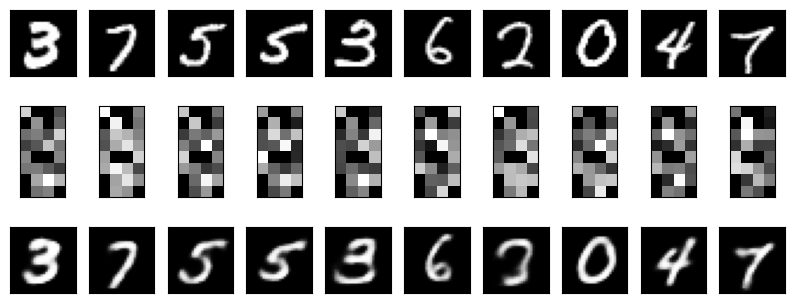

In [24]:
fig, axes = plt.subplots(nrows = 3, ncols = numero_imagens, figsize = (10, 4))
for imagens, ax_row in zip([imagens_teste, imagens_codificadas,
                            imagens_decodificadas], axes):
    for img, ax in zip(imagens, ax_row):
        ax.imshow(img, cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)